# Crash Course in Causality

Name: Hitesh Pant

Nuid: 002794258

In [1]:
from IPython.display import Image

### What is Causality

In Data Analysis and machine learning, we want to go beyond just finding correlations between features, and instead figure out what actually makes something happen(cause-and-effect). 
But unlike usual ML tasks, finding true causes is tricky because sometimes other factors can influence both the cause and the effect, messing up our conclusions. That's why we need to carefully prepare our data before making any claims about cause and effect.

Therefore, meticulous data preparation emerges as the cornerstone of reliable causal inference. Techniques like propensity score matching, instrumental variable selection, and robust regression strategies become essential tools to mitigate the impact of confounding bias and unveil the true causal fabric underlying the data.

In [2]:
Image(url="cor-cas.png", width=600, height=500) 

# Types of Causality

## Direct vs. Indirect Causality:

Direct Causality:This can be illustrated using a simple linear regression model. Imagine studying the relationship between advertising spend (X) and sales (Y). A model like y = a + b*x + error could reveal a positive coefficient (b), suggesting that increasing advertising (X) directly leads to higher sales (Y).


Indirect Causality: Here, additional variables could be included in the model to understand the mediating effect. For example, y = a + b*x + c*brand_awareness + error incorporates brand awareness as a mediator. A significant coefficient for brand awareness (c) suggests that advertising (X) indirectly influences sales (Y) through its impact on brand awareneess.

### Correlation vs. Causality

## Correlation:
A statistical measure of the strength and direction of a linear relationship between two variables.

#### Examples:
A positive correlation between ice cream sales and temperature suggests that they increase together (but doesn't imply ice cream causes temperature).

A negative correlation between studying hours and exam scores implies an inverse relationship (but doesn't necessarily mean studying causes worse scores).

## Causality: 
A causal relationship exists when one variable (cause) directly influences another variable (effect).

#### Examples:
Smoking causes increased lung cancer risk (not just correlated).

Vaccinations cause a decrease in infectious disease (not just correlated with lower disease rates).

#### Establishing Causality:

Difficult and requires more than just observation or correlation.

Methods: Randomized controlled trials (RCTs), quasi-experiments, instrumental variables (IVs), Granger causality tests.


## Workedout Example: Advance House Price

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
pd.pandas.set_option("display.max_columns",None)

In [6]:
dataset = pd.read_csv("housetrain.csv")
print(dataset.shape)

(1460, 81)


In [7]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Data Analysis

1. Missing Values
2. All the Numerical Variables
3. Distribution of Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relation between independent and dependent features(SalesPrice)

## Missing Values

In [5]:
# here wew will only check the percentage of nan values present in each feature

## step1: make list of features which has missing values
feature_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

## step2: print feature and the percentage of missing values
for features in feature_with_na:
    print(features, np.round(dataset[features].isnull().mean(),4), '%missing values')

LotFrontage 0.1774 %missing values
Alley 0.9377 %missing values
MasVnrType 0.0055 %missing values
MasVnrArea 0.0055 %missing values
BsmtQual 0.0253 %missing values
BsmtCond 0.0253 %missing values
BsmtExposure 0.026 %missing values
BsmtFinType1 0.0253 %missing values
BsmtFinType2 0.026 %missing values
FireplaceQu 0.4726 %missing values
GarageType 0.0555 %missing values
GarageYrBlt 0.0555 %missing values
GarageFinish 0.0555 %missing values
GarageQual 0.0555 %missing values
GarageCond 0.0555 %missing values
PoolQC 0.9952 %missing values
Fence 0.8075 %missing values
MiscFeature 0.963 %missing values


## Since they are many missing values, we need to find the relationship between missing values and Sales Price

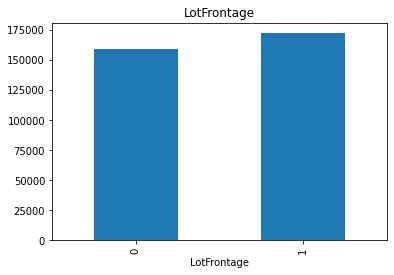

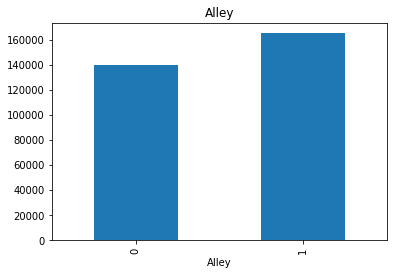

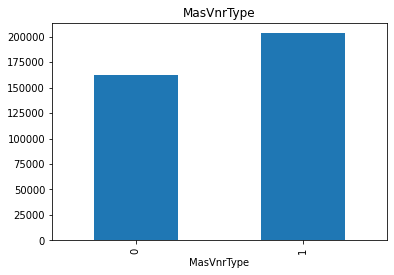

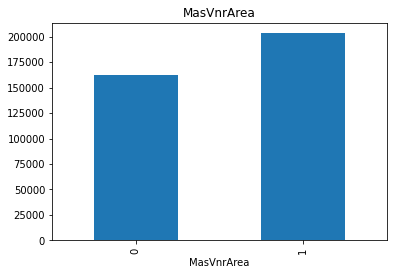

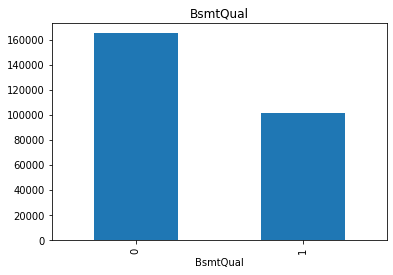

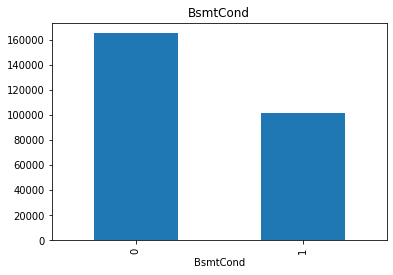

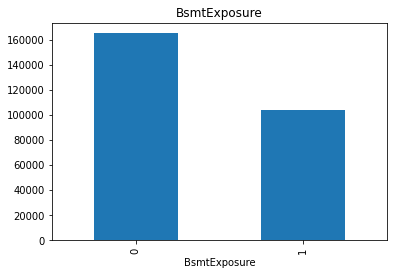

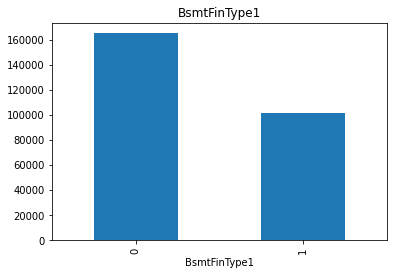

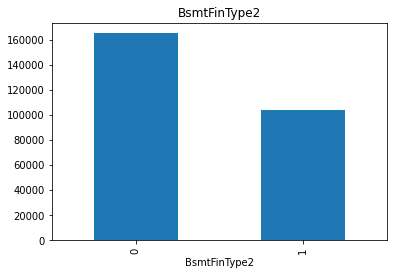

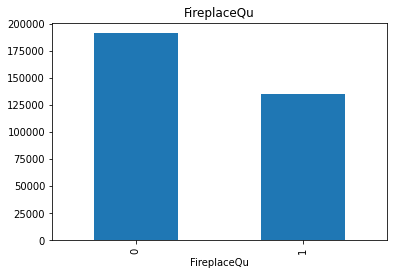

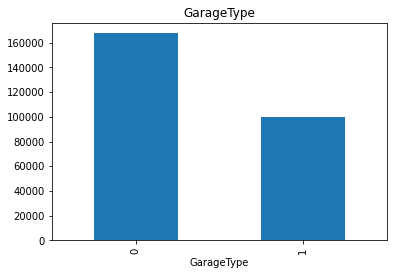

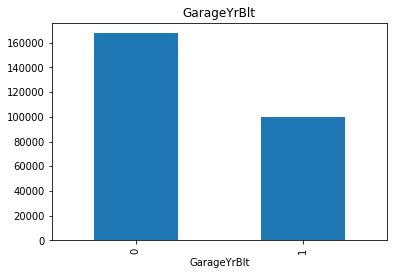

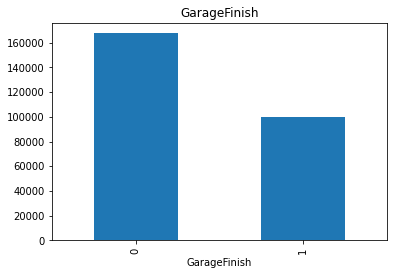

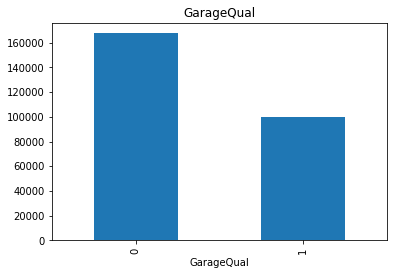

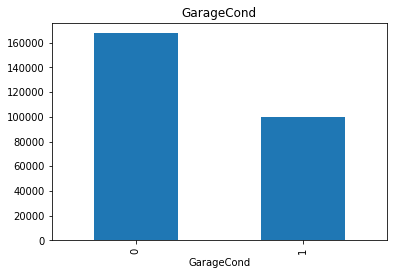

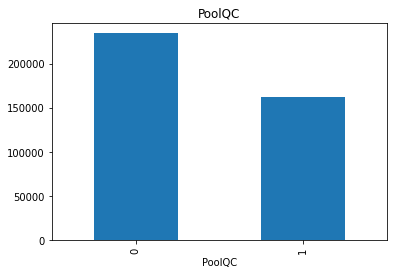

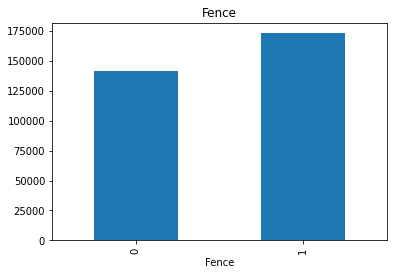

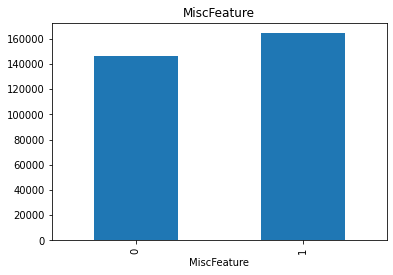

In [6]:
for feature in feature_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

#### Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

In [7]:
print("Id of house {}".format(len(dataset.Id)))

Id of house 1460


## Numerical Features

In [8]:
numerical_features = [feature for feature in dataset .columns if dataset[feature].dtypes != 'O']
print(numerical_features)
print("Number of numerical variables: ", len(numerical_features))

dataset[numerical_features].head()

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [9]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [10]:
for feature in year_feature:
    print(feature, dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs YearSold')

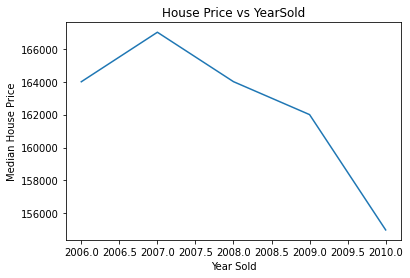

In [11]:
# check if there is a relationship between year house was sold and the sales price

dataset.groupby("YrSold")['SalePrice'].median().plot()
plt.xlabel("Year Sold")
plt.ylabel("Median House Price")
plt.title("House Price vs YearSold")

In [12]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

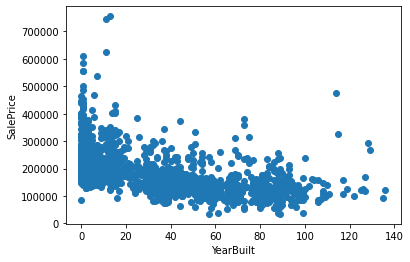

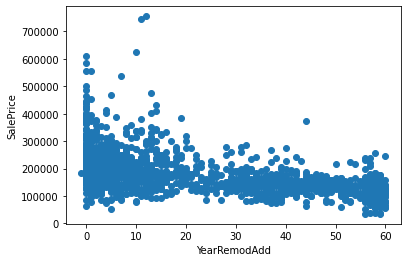

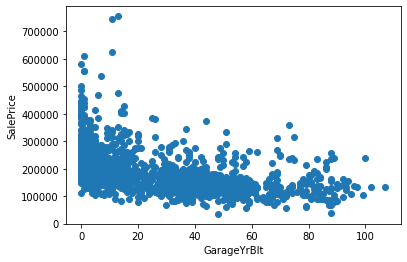

In [13]:
## Here we will compare the difference between All the years feature with SalesPrice

for feature in year_feature:
    if feature!= "YrSold":
        data= dataset.copy()
        # capture the difference between the year variable and the year the house was sold
        data[feature]= data['YrSold']-data[feature]
        
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.show()

## Numerical variables are of 2 type
## continuous variable and Discrete variables

In [14]:
# discrete features

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]

print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [15]:
dataset[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


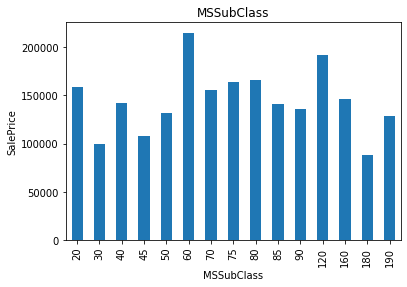

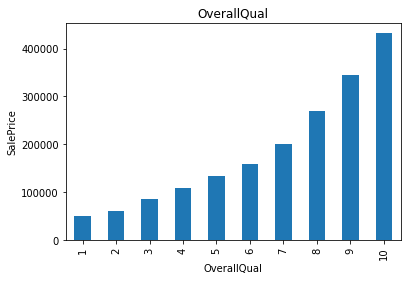

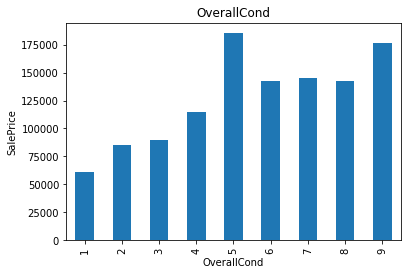

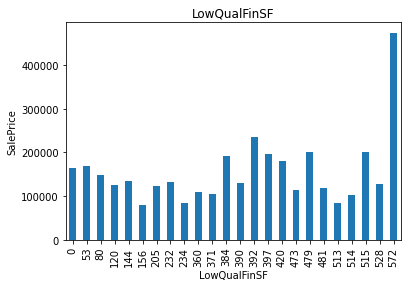

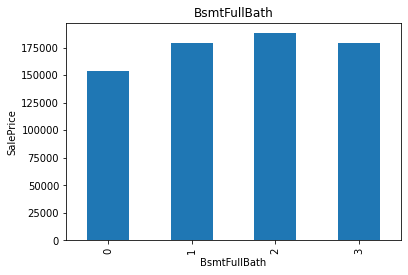

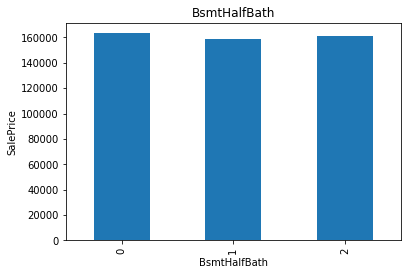

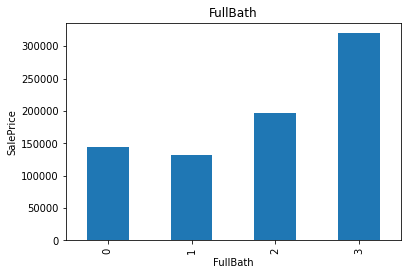

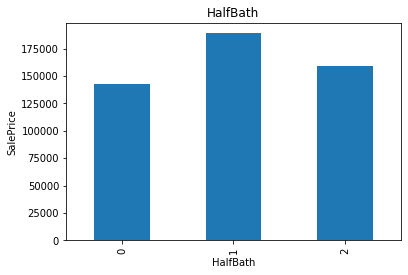

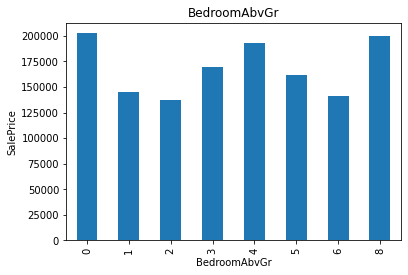

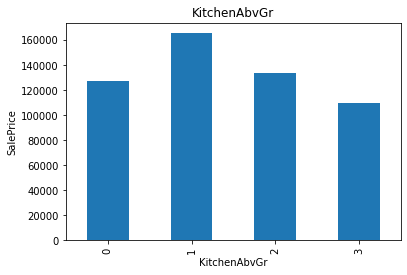

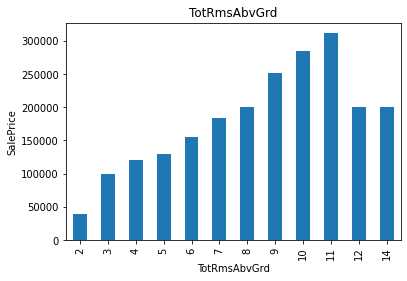

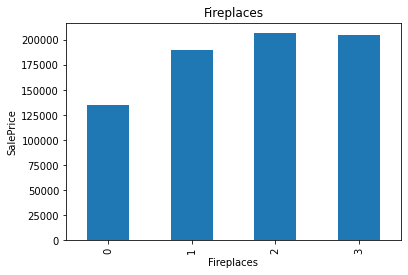

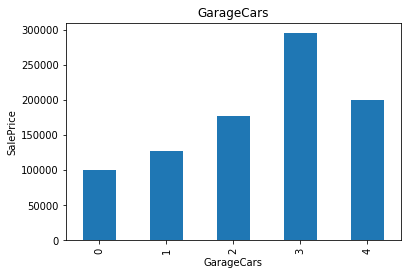

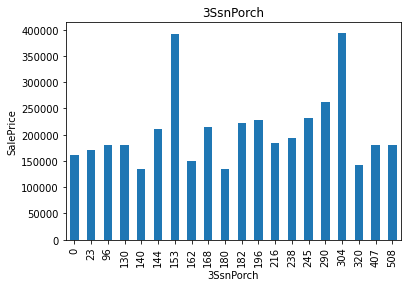

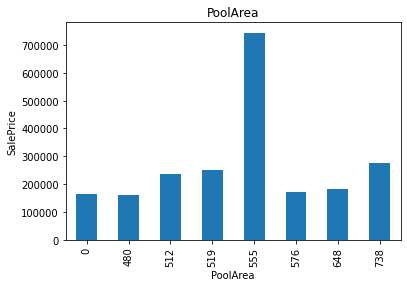

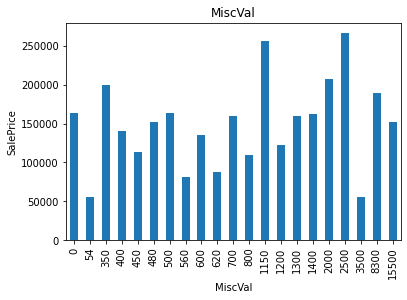

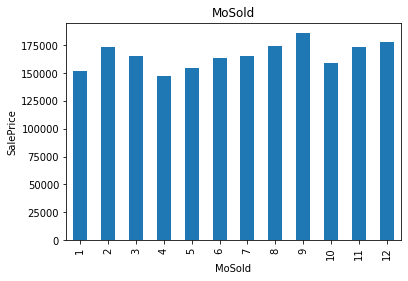

In [16]:
# find relationship between discrete features and sales price

for feature in discrete_feature:
    data= dataset.copy()
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [17]:
# continuous features

continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]

print("Continuous Variables Count: {}".format(len(continuous_feature)))

Continuous Variables Count: 16


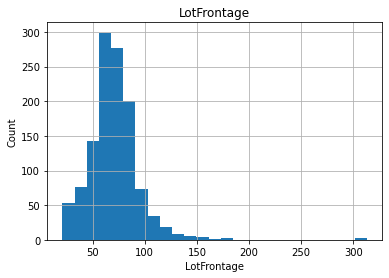

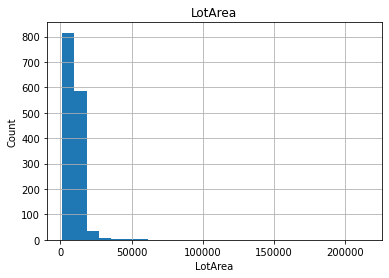

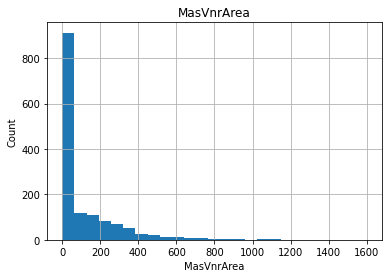

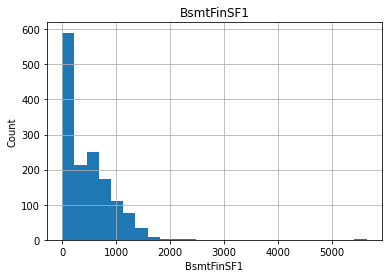

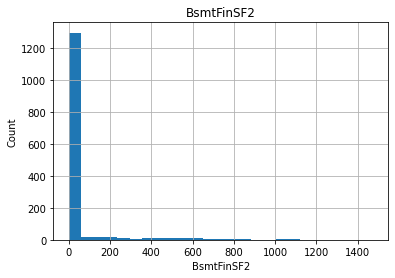

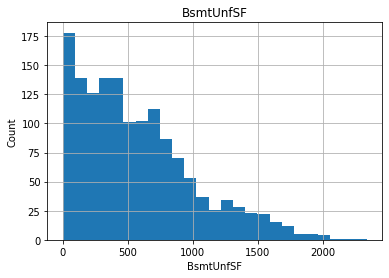

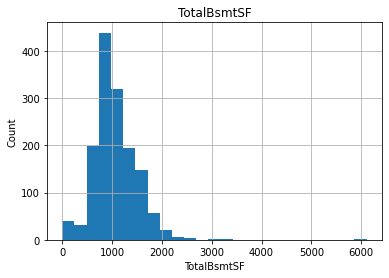

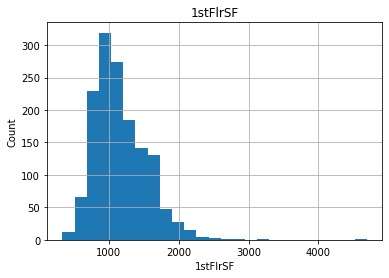

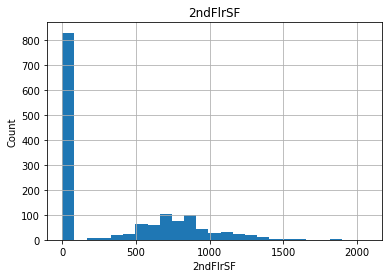

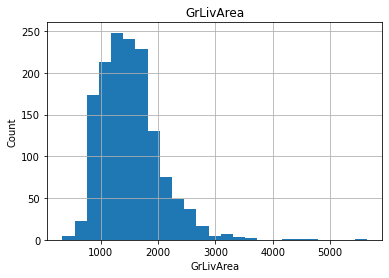

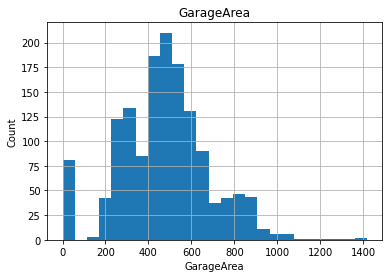

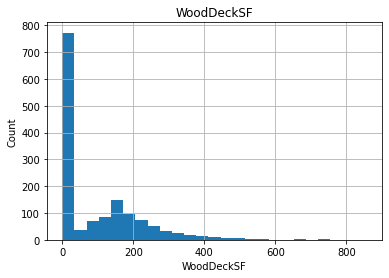

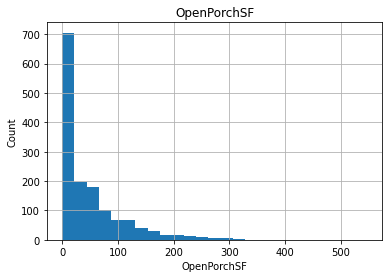

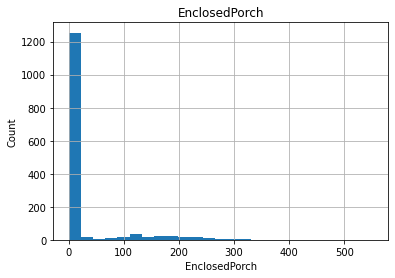

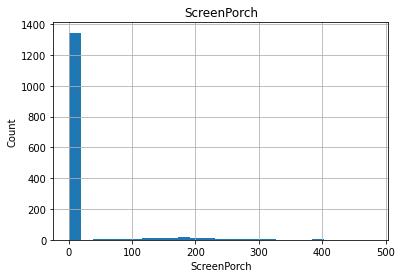

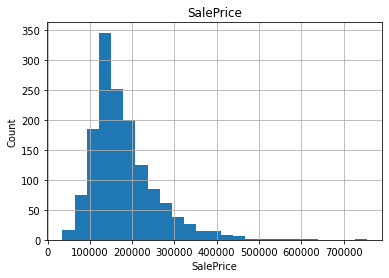

In [18]:
for feature in continuous_feature:
    data= dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()    

## Since the continuous variables are skewed we will use log normal transformation

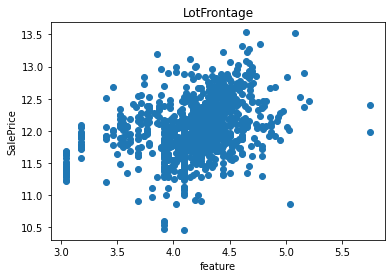

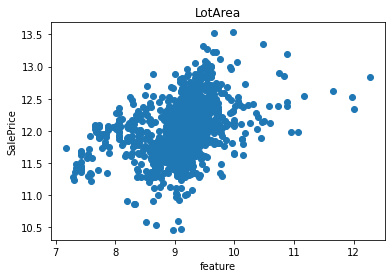

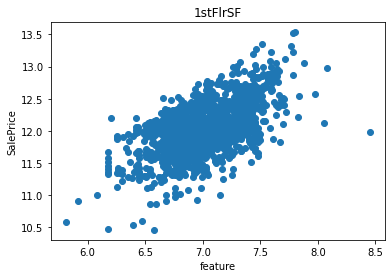

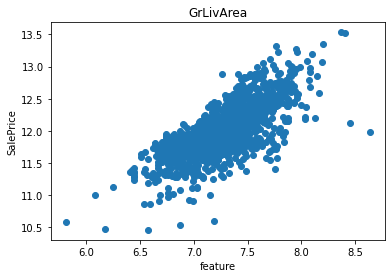

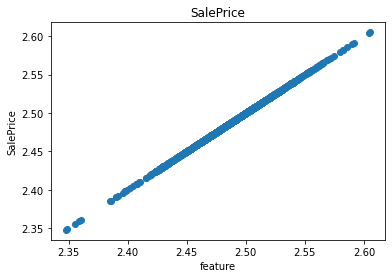

In [19]:
for feature in continuous_feature:
    data= dataset.copy()
    
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]= np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel('feature')
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

## Categorical Features

In [20]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [21]:
dataset[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [28]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature, len(data[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

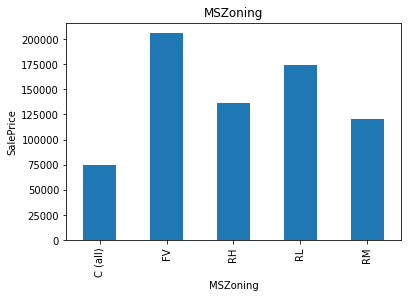

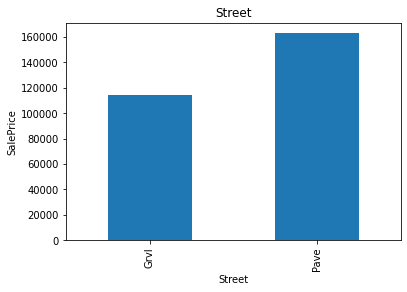

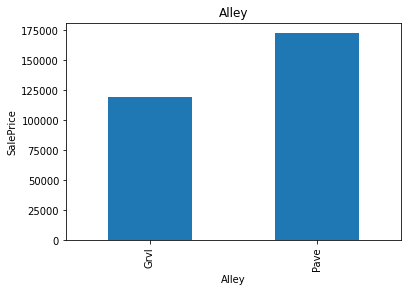

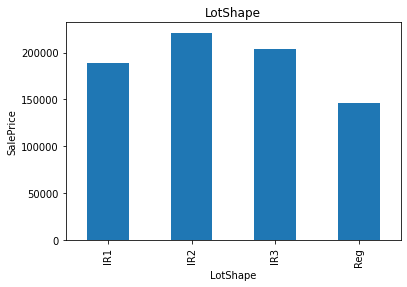

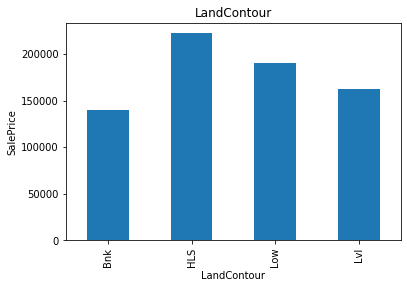

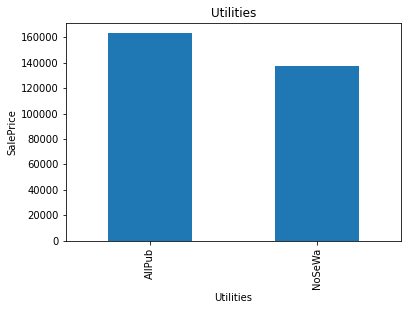

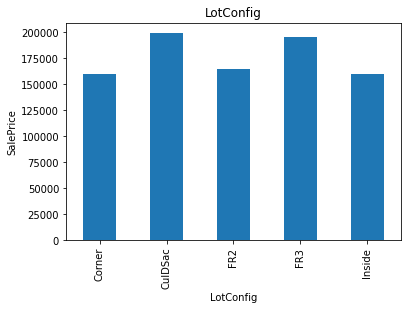

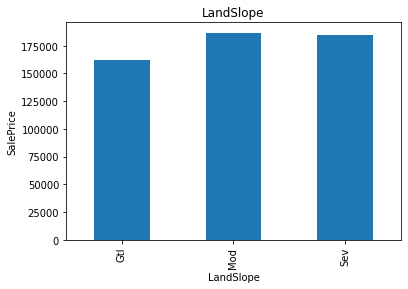

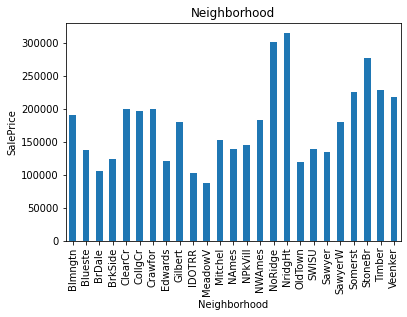

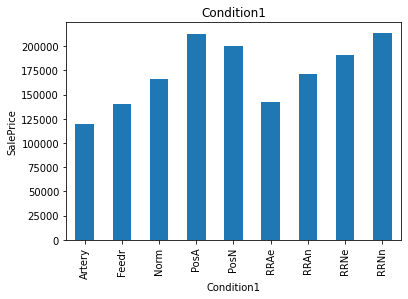

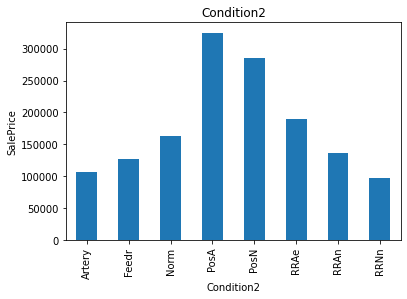

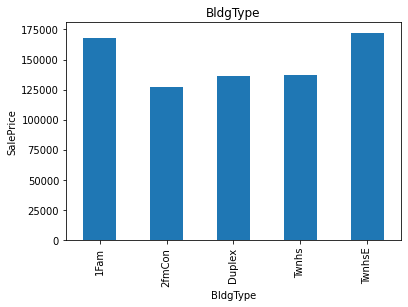

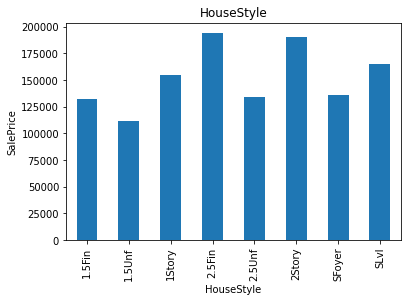

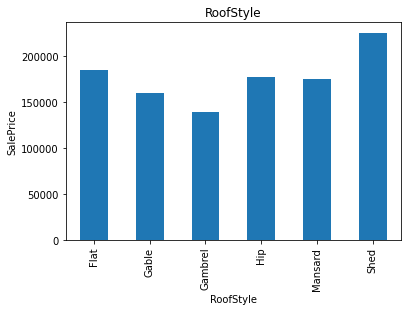

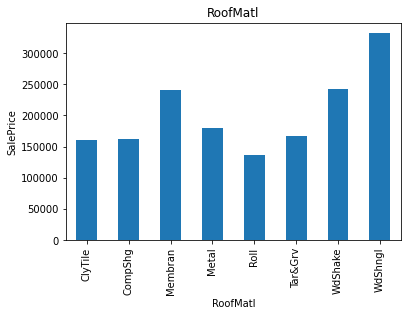

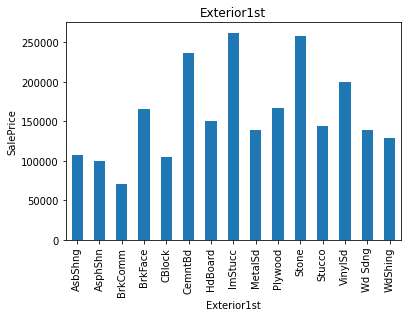

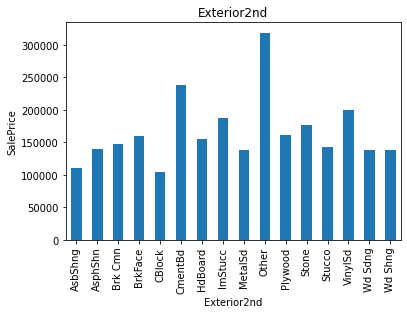

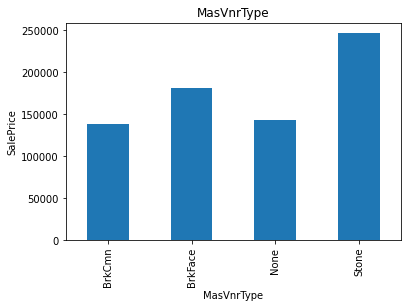

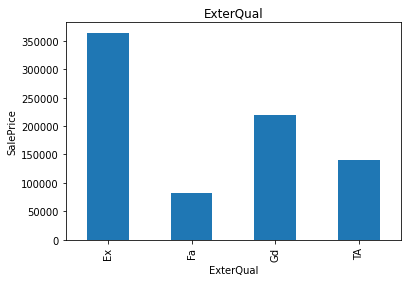

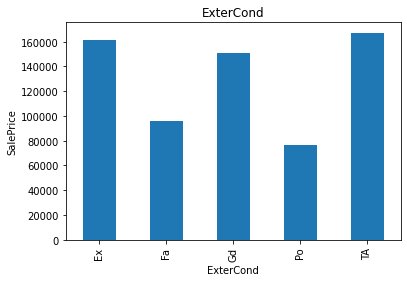

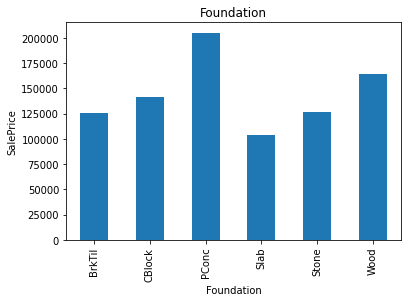

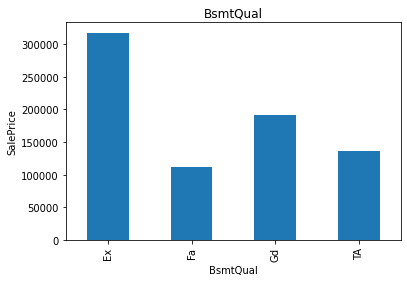

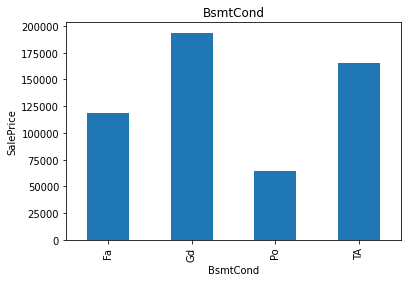

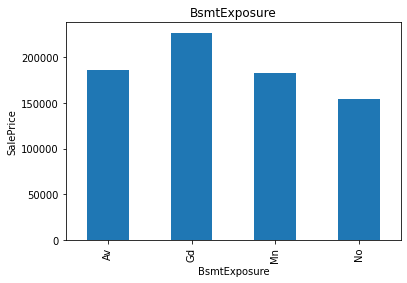

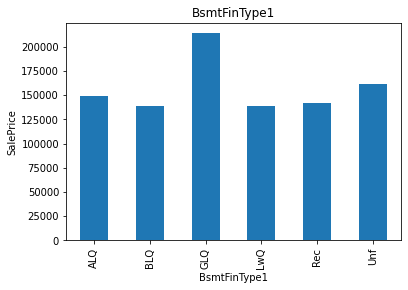

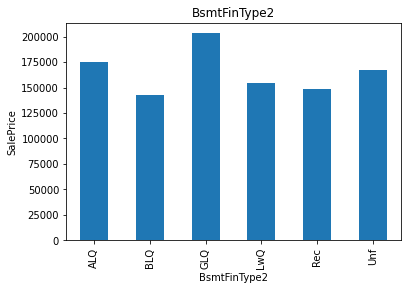

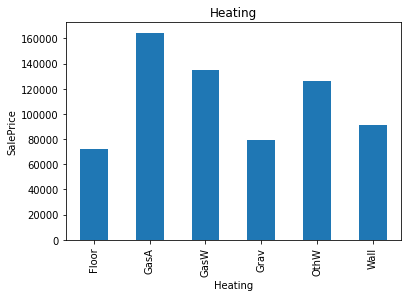

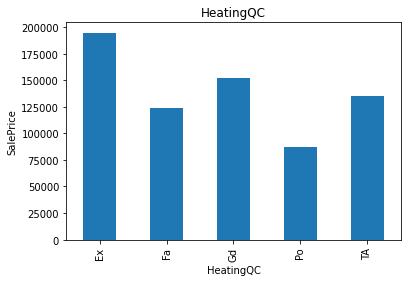

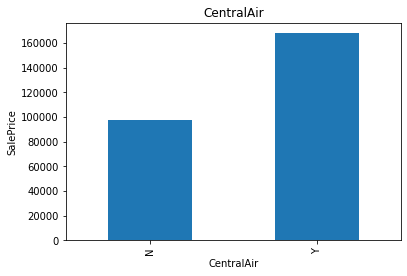

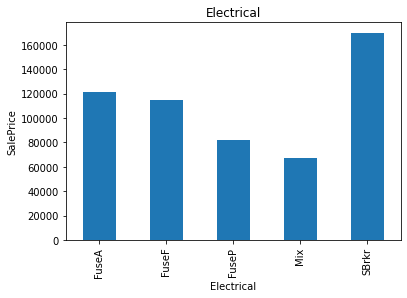

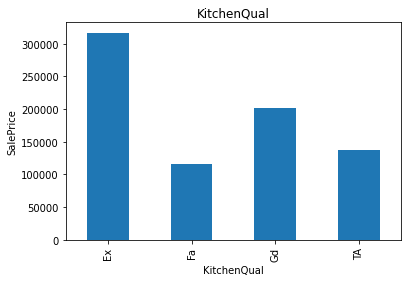

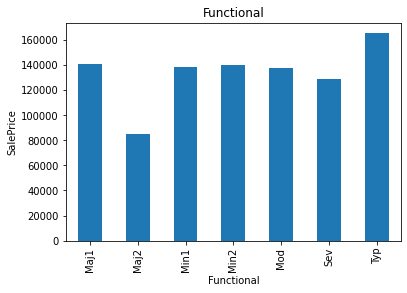

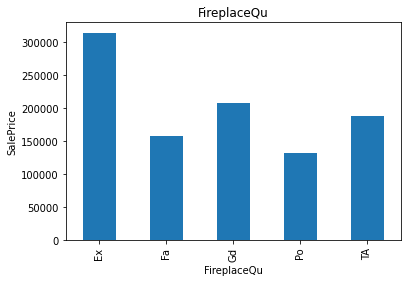

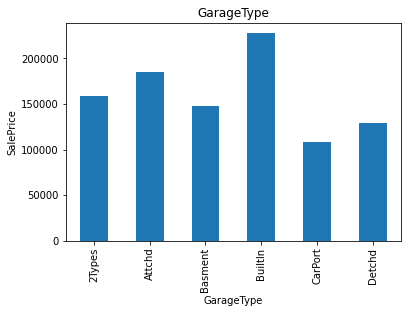

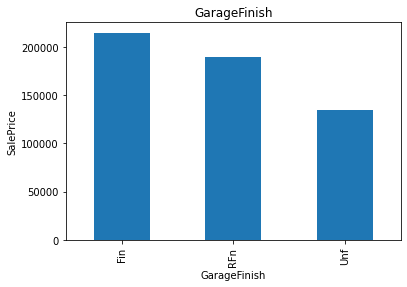

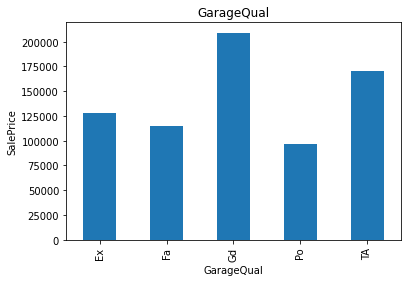

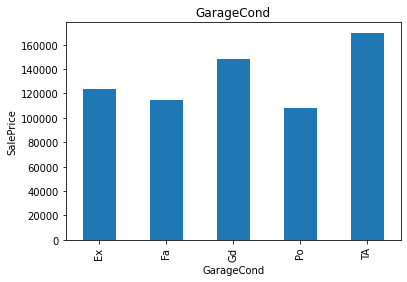

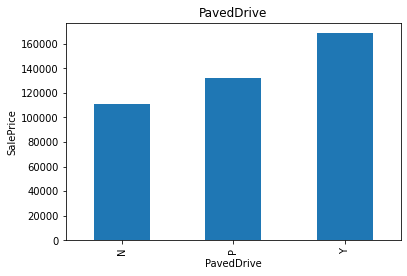

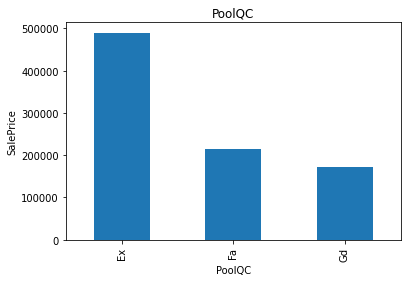

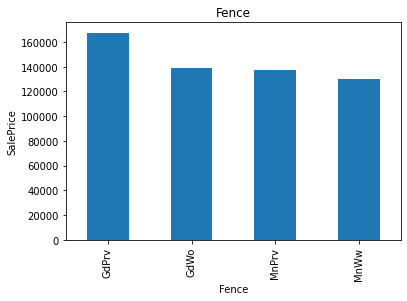

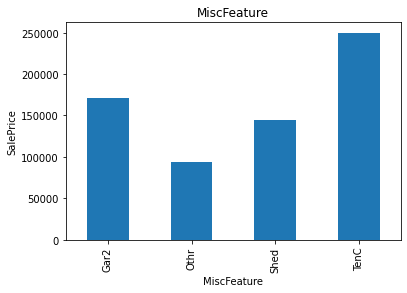

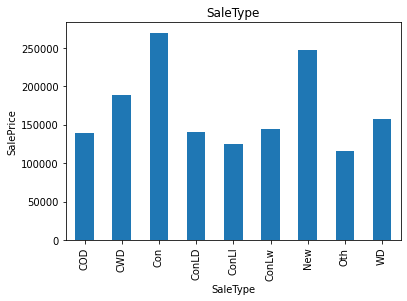

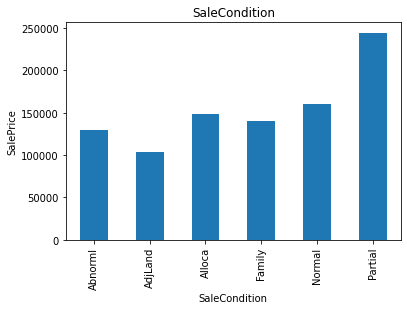

In [23]:
for feature in categorical_features:
    data= dataset.copy()
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

### Conclusion

### Checking Missing Values:
A list of features with missing values is created.

For each feature with missing values, the code prints the feature name and the percentage of missing values.


### Analyzing Missing Values with respect to Target Variable:
For each feature with missing values, a bar plot is generated to visualize the relationship between missing values and the median SalePrice.


### Numerical Feature Analysis:
Numerical features are identified based on their data types.
The code prints the number of numerical variables and displays the head of the numerical features.

Features related to years are identified.

A plot is created to show the relationship between the year the house was sold and the median house price.


### Year Feature Analysis:
For each year-related feature, the unique values are printed.
Scatter plots are generated to show the relationship between the difference in years and SalePrice.


### Discrete Feature Analysis:
Discrete features (with fewer than 25 unique values) are identified.

Bar plots are created to visualize the relationship between discrete features and the median SalePrice.


### Continuous Feature Analysis:
Continuous features are identified.

Histograms are created to visualize the distribution of each continuous feature.

Log-normal transformation is applied to skewed continuous features, and scatter plots are generated to show the transformed relationship with SalePrice.


### Categorical Feature Analysis:
Categorical features are identified based on data types.

For each categorical feature, the unique number of categories is printed.

Bar plots are created to visualize the relationship between categorical features and the median SalePrice.

## Causal Inference using Propensity Score

#### Here we find causal inference using propensity score matching on a housing dataset. The goal is to estimate the average treatment effect of a hypothetical intervention on housing prices.

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [8]:
treatment_variable = 'InterventionOccurred'
target_variable = 'SalePrice'

In [9]:
covariates = ['Covariate1', 'Covariate2', 'Covariate3']

In [12]:
covariates = [
    'OverallQual', 'OverallCond', 'YearBuilt', 'GrLivArea', 
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
    'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
]

### Why Propensity Score Matching?
Propensity score matching is employed when there is a need to estimate the causal effect of a treatment or intervention in observational data. In this case, we want to assess the impact of a hypothetical intervention on housing prices while accounting for potential confounding variables. Propensity score matching helps create comparable treatment and control groups, allowing for a more accurate estimation of the causal effect. The visualizations aid in assessing the balance achieved in covariate distributions after matching.

In [18]:
target_variable = 'SalePrice'

# covariates for propensity score matching
covariates = [
    'OverallQual', 'OverallCond', 'YearBuilt', 'GrLivArea', 
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
    'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
]

In [19]:
# Placeholder for the treatment variable (random assignment)
np.random.seed(42)
dataset['InterventionOccurred'] = np.random.choice([0, 1], size=len(dataset))

# Split the data into treatment and control groups
treatment_data = dataset[dataset['InterventionOccurred'] == 1]
control_data = dataset[dataset['InterventionOccurred'] == 0]

In [20]:

# Train a logistic regression model to predict the propensity scores
X_propensity = dataset[covariates]
y_propensity = dataset['InterventionOccurred']
propensity_model = LogisticRegression()
propensity_model.fit(X_propensity, y_propensity)

LogisticRegression()

In [23]:
# Predict propensity scores
dataset['PropensityScore'] = propensity_model.predict_proba(X_propensity)[:, 1]

# Use statsmodels to perform propensity score matching
matched_data = sm.add_constant(dataset[covariates + ['PropensityScore']])
matched_data['InterventionOccurred'] = dataset['InterventionOccurred']

logit = sm.Logit(matched_data['InterventionOccurred'], matched_data[['PropensityScore'] + covariates])
result = logit.fit()

# Estimate causal effect
average_treatment_effect = result.params['PropensityScore']

# Print the Average Treatment Effect
print(f"Average Treatment Effect: {average_treatment_effect}")

Optimization terminated successfully.
         Current function value: 0.690531
         Iterations 4
Average Treatment Effect: 9.647779113201297


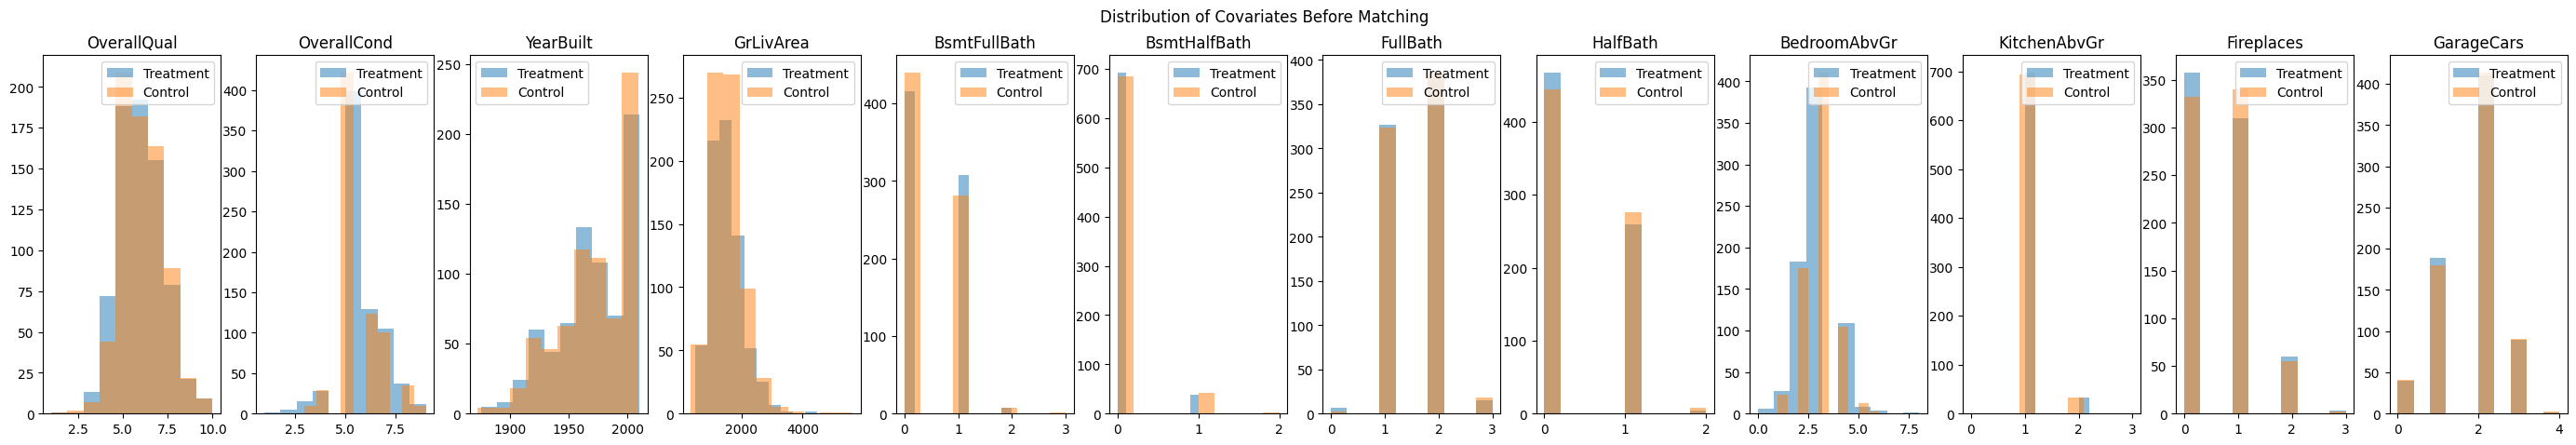

In [30]:
# Visualize the distribution of covariates before and after matching
plt.figure(figsize=(35, 5))

for i, covariate in enumerate(covariates, 1):
    plt.subplot(1, len(covariates), i)
    plt.hist(treatment_data[covariate], alpha=0.5, label='Treatment')
    plt.hist(control_data[covariate], alpha=0.5, label='Control')
    plt.title(covariate)
    plt.legend()

plt.suptitle("Distribution of Covariates Before Matching")
plt.show()

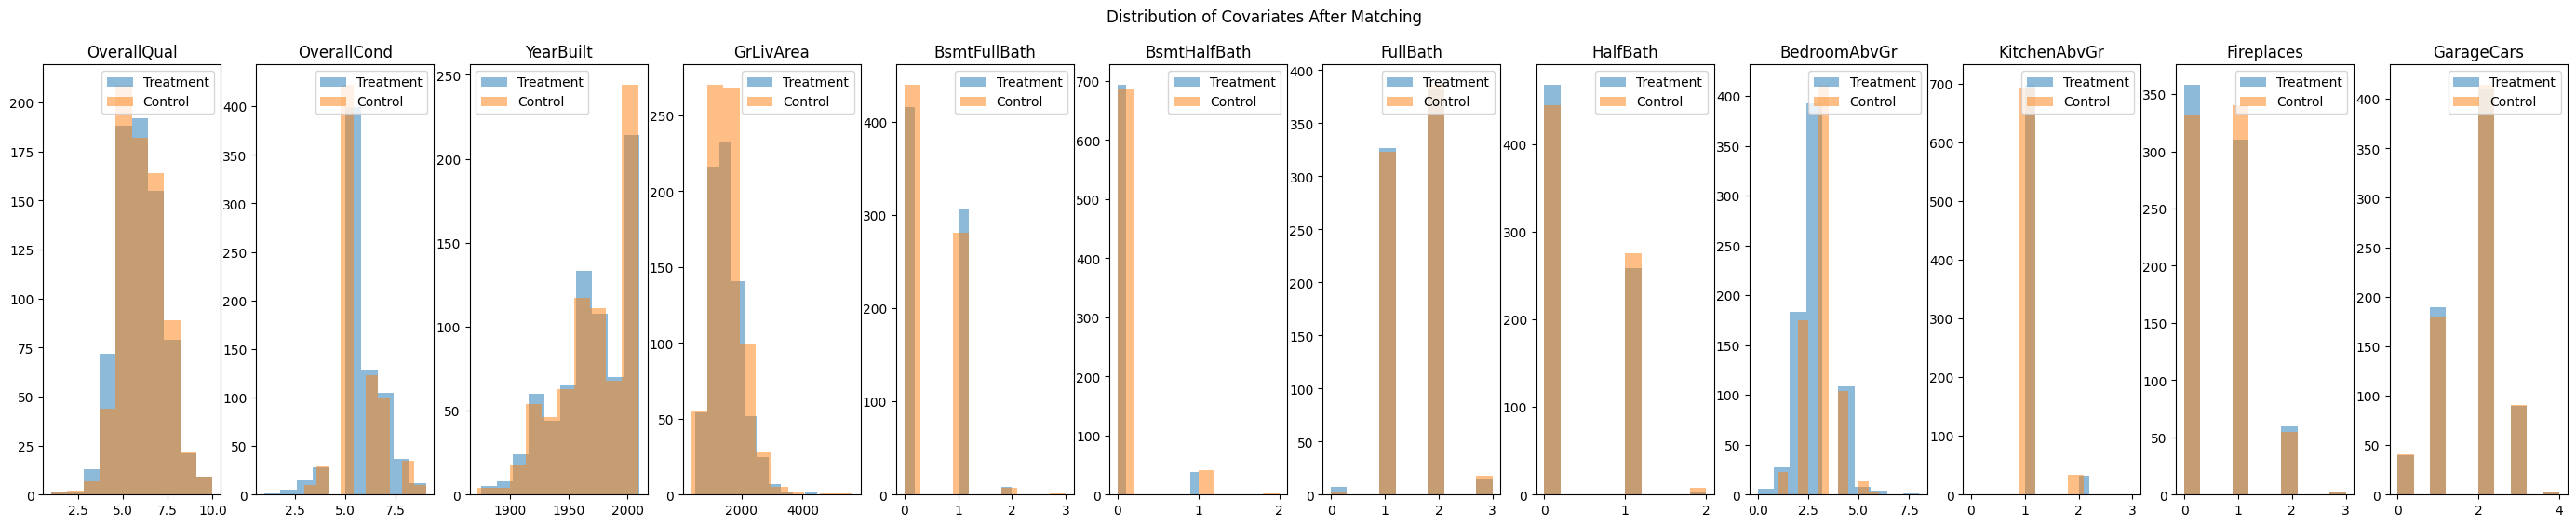

In [31]:
plt.figure(figsize=(35, 6))

for i, covariate in enumerate(covariates, 1):
    plt.subplot(1, len(covariates), i)
    plt.hist(matched_data[matched_data['InterventionOccurred'] == 1][covariate], alpha=0.5, label='Treatment')
    plt.hist(matched_data[matched_data['InterventionOccurred'] == 0][covariate], alpha=0.5, label='Control')
    plt.title(covariate)
    plt.legend()

plt.suptitle("Distribution of Covariates After Matching")
plt.show()

prices).

### Conclusion

The logistic regression model successfully converged to an optimal solution, indicating that the optimization process terminated successfully. The current function value, which represents the log-likelihood of the model, is approximately 0.6905, and the optimization required 4 iterations to converge.

The estimated Average Treatment Effect (ATE) is approximately 9.65. This value represents the average difference in the log-odds of the treatment group (intervention occurred) compared to the control group (intervention did not occur).


### Interpreting this result:
A positive ATE suggests that, on average, the treatment group is associated with a higher likelihood of the intervention occurring, compared to the control group.
The magnitude of the ATE (9.65) provides insights into the strength and direction of the effect. However, interpretation may vary based on the specific context of the dataset and the units of the outcome variable.


It's essential to note that the interpretation of the ATE depends on the characteristics of the dataset, the chosen covariates, and the validity of the assumptions made during the propensity score matching process. Further analysis and domain-specific knowledge are crucial for a comprehensive understanding of the causal relationship between the intervention and the outcome variable (housing prices).

### Reference

1. Elizabeth A. Stuart. (2010). "Matching methods for causal inference: A review and a look forward." Statistical Science, 25(1), 1-21.

2. Miguel Hernán, James M. Robins. (2020). "Causal Inference: What If." Chapman & Hall/CRC.

3. https://www.kaggle.com/code/koheimuramatsu/change-detection-forecasting-in-smart-home